# **Programming assignment for the Perceptron/Adaline models**

## Defining the Perceptron Class

In [2]:
import numpy as np

class Perceptron(object):
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)





# Defining the Adeline Class

In [3]:
class AdalineSGD(object):

    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.shuffle = shuffle
        self.random_state = random_state
        self.w_initialized = False
    
    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights."""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data."""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        """Initialize weights to small random numbers."""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights."""
        net_input = self.net_input(xi)
        output = self.activation(net_input)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)



## Link Iris Dataset & define Ploting function

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Link to the database
s = os.path.join('http://archive.ics.uci.edu', 'ml','machine-learning-databases','iris','iris.data')
df = pd.read_csv(s, header=None, encoding='utf-8')

# Select Setosa and Versicolor (binary classification)
y = df.iloc[50:150, 4].values
y = np.where(y == 'Iris-versicolor', -1, 1)

# Extract (0)sepal length, (1)sepal width, (2)petal length, (3)petal width
X = df.iloc[50:150, [1,3]].values



def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
         plt.scatter(x=X[y == cl, 0], 
                     y=X[y == cl, 1], 
                     alpha=0.8, 
                     c=colors[idx],
                     marker=markers[idx], 
                     label=cl, 
                     facecolor='black')

# Train Models and Plot the data with two features: Petal length & Sepal length

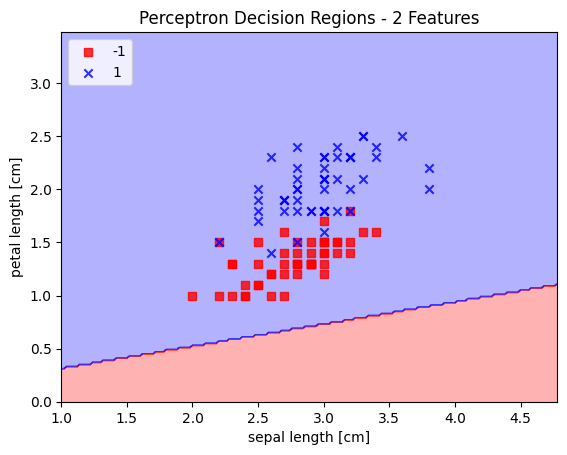

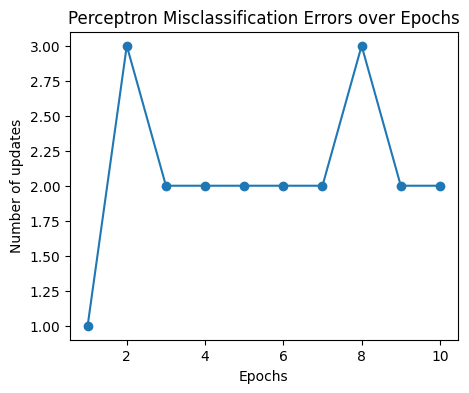

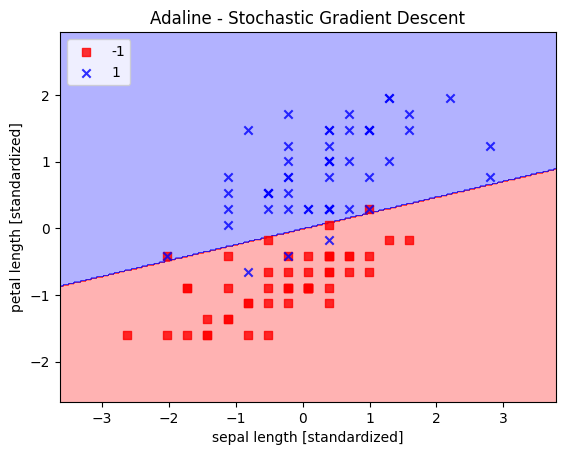

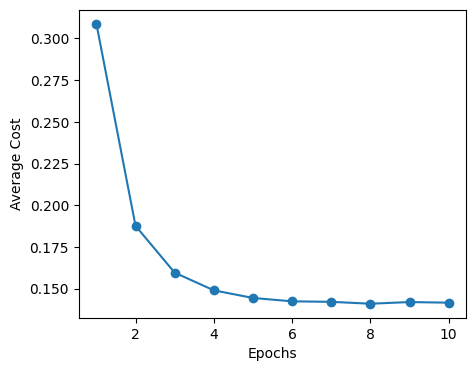

In [13]:

# Train the Perceptron on the Iris dataset
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

# Plotting the decision regions
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.title('Perceptron Decision Regions - 2 Features')
plt.show()

# Plot misclassification errors over epochs
plt.figure(figsize=(5, 4))
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title('Perceptron Misclassification Errors over Epochs')
plt.show()

#Apply Standardization for SGD
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

# Example usage to plot decision boundaries
ada_sgd = AdalineSGD(n_iter=10, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

# Plot misclassification errors over epochs
plt.figure(figsize=(5, 4))
plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()



## Running Models on Three Features:  -  Sepal length & width, and Petal length

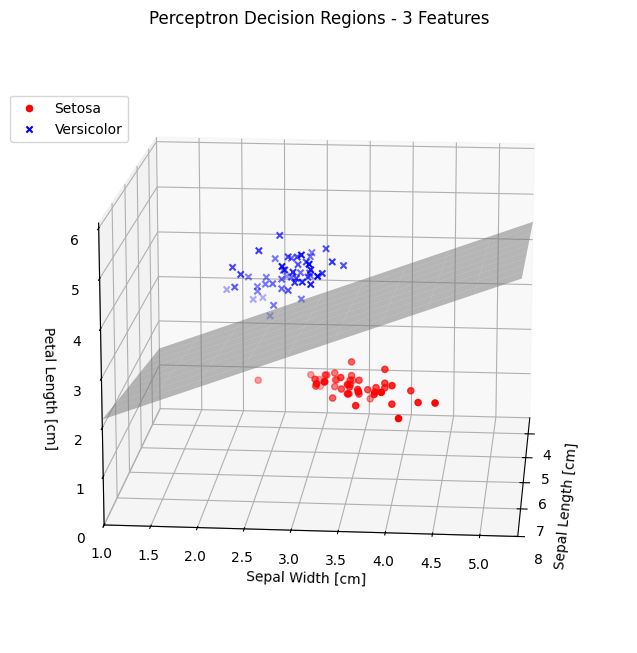

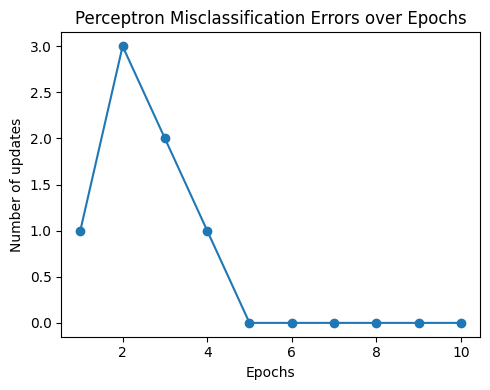

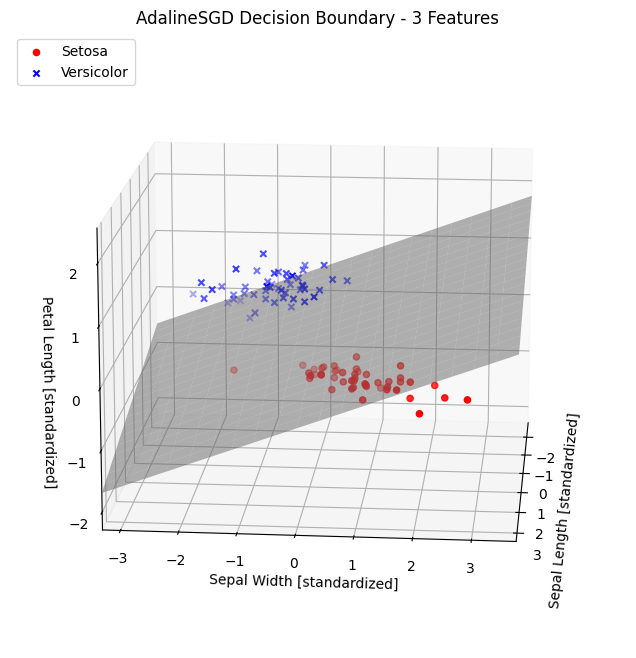

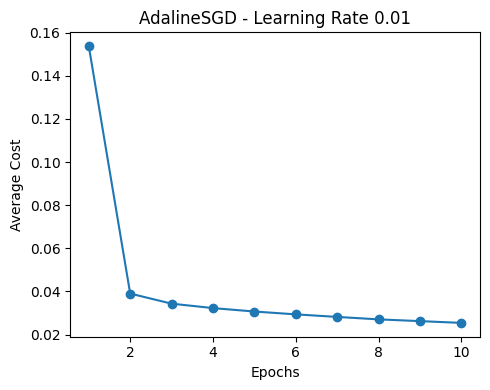

In [6]:
# from mpl_toolkits.mplot3d import Axes3D
# Sample data
X = df.iloc[0:100, [0, 1, 2]].values  # sepal length, sepal width, and petal length

# Train the Perceptron
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

# Define ranges for each feature
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # Sepal Length
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # Sepal Width
z_min, z_max = X[:, 2].min() - 1, X[:, 2].max() + 1  # Petal Length

# Create a meshgrid for x and y
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 10),
                     np.linspace(y_min, y_max, 10))

# Extract weights
w = ppn.w_

# Calculate zz for the decision boundary plane
if w[3] != 0:
    zz = (-w[0] - w[1] * xx - w[2] * yy) / w[3]
else:
    zz = np.zeros_like(xx)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the decision boundary plane
ax.plot_surface(xx, yy, zz, alpha=0.5, color='gray')

# Plot the data points
ax.scatter(X[y == -1, 0], X[y == -1, 1], X[y == -1, 2],
           color='red', marker='o', label='Setosa')
ax.scatter(X[y == 1, 0], X[y == 1, 1], X[y == 1, 2],
           color='blue', marker='x', label='Versicolor')

# Label axes
ax.set_xlabel('Sepal Length [cm]')
ax.set_ylabel('Sepal Width [cm]')
ax.set_zlabel('Petal Length [cm]')

# Set limits
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_zlim(z_min, z_max)

# Adjust the view angle
ax.view_init(elev=15, azim=5)

# Add legend and title"
ax.legend(loc='upper right',bbox_to_anchor=(0.2, 0.9))
ax.set_title('Perceptron Decision Regions - 3 Features', pad = 2)

plt.show()

# Plot misclassification errors over epochs
plt.figure(figsize=(5, 4))
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title('Perceptron Misclassification Errors over Epochs')
plt.tight_layout()
plt.show()

#-------------------------------------------------------------------------------------------------------


# Standardize the features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()  # Sepal Length
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()  # Sepal Width
X_std[:, 2] = (X[:, 2] - X[:, 2].mean()) / X[:, 2].std()  # Petal Length


# Train the AdalineSGD model
ada_sgd = AdalineSGD(n_iter=10, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

# Extract weights
w = ada_sgd.w_  # w = [w0, w1, w2, w3]

# Define ranges for the first two features
x_min, x_max = X_std[:, 0].min() - 1, X_std[:, 0].max() + 1  # Sepal Length
y_min, y_max = X_std[:, 1].min() - 1, X_std[:, 1].max() + 1  # Sepal Width

# Create a meshgrid for x and y
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 20),
                     np.linspace(y_min, y_max, 20))

# Calculate zz for the decision boundary plane
if w[3] != 0:
    zz = (-w[0] - w[1] * xx - w[2] * yy) / w[3]
else:
    zz = np.zeros_like(xx)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the decision boundary plane
ax.plot_surface(xx, yy, zz, alpha=0.5, color='gray')

# Plot the data points
ax.scatter(X_std[y == -1, 0], X_std[y == -1, 1], X_std[y == -1, 2],
           color='red', marker='o', label='Setosa')
ax.scatter(X_std[y == 1, 0], X_std[y == 1, 1], X_std[y == 1, 2],
           color='blue', marker='x', label='Versicolor')

# Label axes
ax.set_xlabel('Sepal Length [standardized]')
ax.set_ylabel('Sepal Width [standardized]')
ax.set_zlabel('Petal Length [standardized]')

# Set limits
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_zlim(X_std[:, 2].min() - 1, X_std[:, 2].max() + 1)

# Adjust the view angle
ax.view_init(elev=15, azim=5)

# Add legend and title
ax.legend(loc='upper left')
ax.set_title('AdalineSGD Decision Boundary - 3 Features')

plt.show()

# Plot the cost over epochs
plt.figure(figsize=(5, 4))
plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.title('AdalineSGD - Learning Rate 0.01')
plt.tight_layout()
plt.show()


## Running Perceptron ALL features Using PCA

In [7]:
#from sklearn.decomposition import PCA

# Prepare data with all four features
X = df.iloc[0:100, [0, 1, 2, 3]].values
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Train the Perceptron on the PCA-transformed data
ppn_pca = Perceptron(eta=0.1, n_iter=8)
ppn_pca.fit(X_pca, y)

# Plot decision regions
plot_decision_regions(X_pca, y, classifier=ppn_pca)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left')
plt.title('Perceptron Decision Regions on PCA-Transformed Data')
plt.show()


# Plot misclassification errors over epochs
plt.figure(figsize=(5, 4))
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title('Perceptron Misclassification Errors over Epochs')
plt.show()



# Standardize the PCA-transformed data
X_pca_std = (X_pca - X_pca.mean(axis=0)) / X_pca.std(axis=0)

# Train the Adaline model
ada_pca = AdalineSGD(n_iter=10, eta=0.01, random_state=1)
ada_pca.fit(X_pca_std, y)

# Plot decision regions
plt.figure(figsize=(8, 6))
plot_decision_regions(X_pca_std, y, classifier=ada_pca)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left')
plt.title('Adaline Decision Regions on PCA-Transformed Data')
plt.show()

# Plot cost over epochs
plt.figure(figsize=(5, 4))
plt.plot(range(1, len(ada_pca.cost_) + 1), ada_pca.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.title('Adaline - Learning Rate 0.01')
plt.show()


NameError: name 'PCA' is not defined